# HARP PRESS Scoring
    Matthew Muller
    2/26/2024

## Data Cleaning

Prior to this file, data was cleaned using R. This involved changing gene IDs and also log-MOR normalization using DESeq2.

In [109]:
## General Packages Needed
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from joblib import load
from sklearn.metrics import roc_auc_score, confusion_matrix
from MattTools.plotting import plot_roc_curve, plot_confusion_matrix, plot_training_roc_curve_ci, plot_roc_curve_ci


# %cd ..
#############################################################
#
#               Data Loading and Cleaning 
#
#############################################################


harp_counts = pd.read_csv('output/harp_predictions__run_1/harp_se.RData/counts_log2-mor.txt',sep = ', ').T #.values
harp_names = harp_counts.index
harp_counts = harp_counts.values

model = load('models/jobs/press_01_model_voting_a_ton_of_trees.joblib')

pace_counts = pd.read_csv('data/clean/pace/features.csv')

# set the column order of harp_counts to match pace_counts
# harp_counts = harp_counts[pace_counts.columns]

#


/var/folders/05/f45rjpnn49g5gt5qgn93bhcc0000gn/T/ipykernel_29024/3893252632.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  harp_counts = pd.read_csv('output/harp_predictions__run_1/harp_se.RData/counts_log2-mor.txt',sep = ', ').T#.values


/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


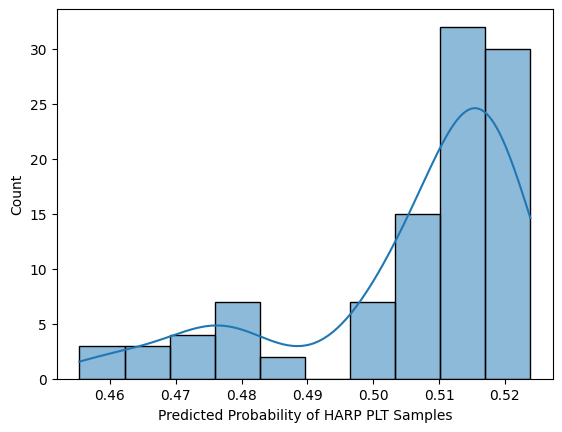

In [114]:
# subset harp counts to make them the new pres
# harp_counts = StandardScaler().fit_transform(harp_counts)
preds = model.predict_proba(harp_counts)[ :, 0]

sns.histplot(preds, bins=10, kde=True)
plt.xlabel('Predicted Probability of HARP PLT Samples')

# save the plot
plt.savefig('output/harp_hyper_v_hypo_predictions.png', dpi=300, bbox_inches='tight')

# save the predicitons to a csv
harp_preds = pd.DataFrame(preds, columns=['harp_preds'], index=harp_names)
harp_preds.to_csv('output/harp_hyper_v_hypo_predictions.csv')